In [8]:
import os

import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras import regularizers

In [9]:
df: pd.DataFrame = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
df["gender"] = label_encoder.fit_transform(df['gender'])
df["ever_married"] = label_encoder.fit_transform(df["ever_married"])
df["work_type"] = label_encoder.fit_transform(df["work_type"])
df["Residence_type"] = label_encoder.fit_transform(df["Residence_type"])
df["smoking_status"] = label_encoder.fit_transform(df["smoking_status"])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [14]:
df = df.fillna(df.mean())

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [17]:
x = df.drop(['id',"stroke"], axis=1)
y = df['stroke']

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [26]:
optimizers = ['Adam']

In [27]:
def make_model(_optimizer, _i) -> keras.Sequential:
    model = keras.Sequential(name=f'stroke_{_i}')
    model.add(keras.Input((10,)))
    model.add(Dense(256, activation='relu',activity_regularizer='l1'))
    model.add(Dense(256, activation='relu',activity_regularizer='l1'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=_optimizer,
        metrics=['accuracy']
    )

    model.summary()
    return model

In [28]:
models = []
for i, optimizer in enumerate(optimizers):
    model = make_model(optimizer, i)
    models.append(model)

Model: "stroke_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               2816      
                                                                 
 dense_31 (Dense)            (None, 256)               65792     
                                                                 
 dense_32 (Dense)            (None, 1)                 257       
                                                                 
Total params: 68865 (269.00 KB)
Trainable params: 68865 (269.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
histories = []
for i, model in enumerate(models):
    histories.append(model.fit(xtrain, ytrain, epochs=40, batch_size=10).history)
    model.save(f'saved/Q1/stroke_{i}.h5')

Epoch 1/40
384/384 [==============================] - 2s 3ms/step - loss: 2.2366 - accuracy: 0.9483
Epoch 2/40
384/384 [==============================] - 1s 3ms/step - loss: 0.2529 - accuracy: 0.9512
Epoch 3/40
384/384 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.9512
Epoch 4/40
384/384 [==============================] - 1s 3ms/step - loss: 0.2248 - accuracy: 0.9512
Epoch 5/40
384/384 [==============================] - 1s 3ms/step - loss: 0.2199 - accuracy: 0.9512
Epoch 6/40
384/384 [==============================] - 1s 3ms/step - loss: 0.2133 - accuracy: 0.9512
Epoch 7/40
384/384 [==============================] - 1s 3ms/step - loss: 0.2216 - accuracy: 0.9512
Epoch 8/40
384/384 [==============================] - 1s 3ms/step - loss: 0.2136 - accuracy: 0.9512
Epoch 9/40
384/384 [==============================] - 1s 3ms/step - loss: 0.2048 - accuracy: 0.9512
Epoch 10/40
384/384 [==============================] - 1s 3ms/step - loss: 0.2022 - accuracy: 0.9512

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
histories[0].keys()

dict_keys(['loss', 'accuracy'])

In [31]:
acc_scores = []
hs = []
for i, model in enumerate(models):
    ypred = model.predict(xtest)
    print(ypred.shape)
    for j in range(len(ypred)):
        if ypred[j] < 0.5: ypred[j] = 0
        else: ypred[j] = 1
    print(ypred.shape)
    
    acc_scores.append(accuracy_score(ytest, ypred))

    hs.append({
        'acc': histories[i]['accuracy'],
        'loss': histories[i]['loss']
    })    

40/40 [==============================] - 0s 2ms/step
(1278, 1)
(1278, 1)


In [32]:
for i, optimizer in enumerate(optimizers):
    print(f'{optimizer}: {acc_scores[i]:.2f}')

Adam: 0.95


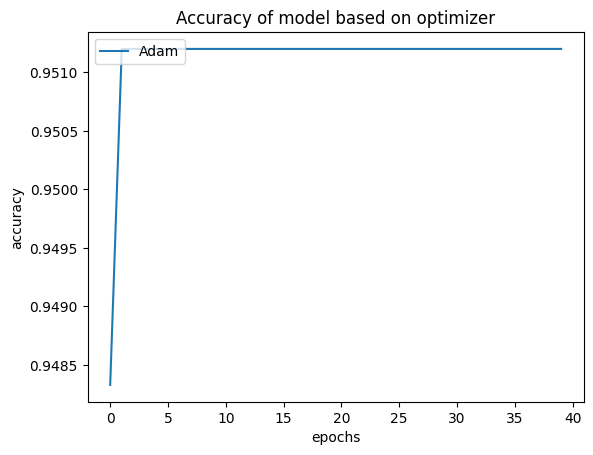

In [33]:
for i in range(len(hs)):
    plt.plot(hs[i]['acc'])
    plt.title('Accuracy of model based on optimizer')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')

plt.legend(optimizers, loc='upper left')
plt.show()

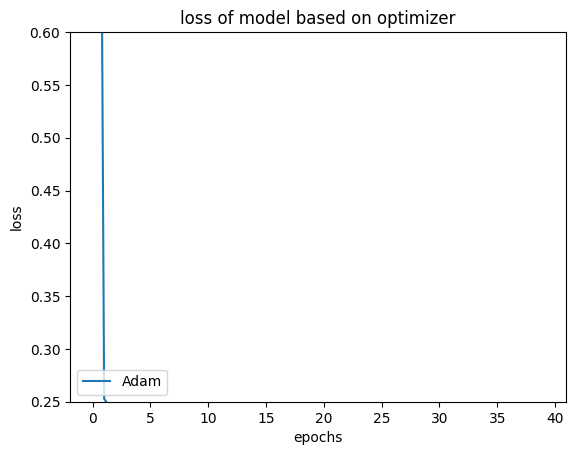

In [34]:
for i in range(len(hs)):
    plt.plot(hs[i]['loss'])
    plt.title('loss of model based on optimizer')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.ylim([0.25, 0.60])

plt.legend(optimizers, loc='lower left')
plt.show()